<a href="https://colab.research.google.com/github/PragyaGupta2912/Human-Activity-Recognition/blob/main/har_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!wget "https://drive.google.com/file/d/1-LvLQa3YkHEreZ_VnFLQtUL5A-JO4dSO/view?usp=sharing"

--2022-02-14 09:28:59--  https://drive.google.com/file/d/1-LvLQa3YkHEreZ_VnFLQtUL5A-JO4dSO/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.195.113, 74.125.195.138, 74.125.195.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/file/d/1-LvLQa3YkHEreZ_VnFLQtUL5A-JO4dSO/view?usp%3Dsharing&followup=https://drive.google.com/file/d/1-LvLQa3YkHEreZ_VnFLQtUL5A-JO4dSO/view?usp%3Dsharing [following]
--2022-02-14 09:29:00--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/file/d/1-LvLQa3YkHEreZ_VnFLQtUL5A-JO4dSO/view?usp%3Dsharing&followup=https://drive.google.com/file/d/1-LvLQa3YkHEreZ_VnFLQtUL5A-JO4dSO/view?usp%3Dsharing
Resolving accounts.google.com (accounts.google.com)... 74.125.142.84, 2607:f8b0:40

In [ ]:
!unzip -q "/content/gdrive/My Drive/dataset_har/Dataset.zip"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
xtrain=pd.read_table('UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)
xtest=pd.read_table('UCI HAR Dataset/test/X_test.txt',delim_whitespace=True,header=None)
ytrain=pd.read_table('UCI HAR Dataset/train/y_train.txt',header=None)
ytest=pd.read_table('UCI HAR Dataset/test/y_test.txt',header=None)

In [ ]:
#converting into array
xtrain=xtrain.values 
xtest=xtest.values
ytrain=ytrain.values
ytest=ytest.values


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 24) #setting k= square root of 561
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(str(accuracy_score(ytest,ypred)*100) + ' %')

90.22734984730234 %


In [ ]:
#Finding the optimal model by varying the no. of neighbors
scores = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    scores.append(accuracy_score(ytest,ypred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

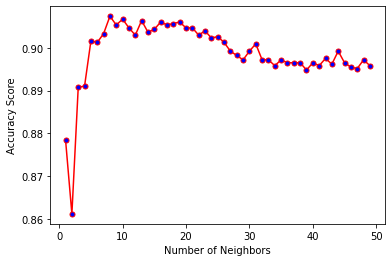

In [ ]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
plt.show()

In [ ]:
scores = np.array(scores)

In [ ]:
#Final result after training the model
print('Optimal No. Of Neighbors: ', scores.argmax()+1)
print('Accuracy Score: '+ str(scores.max()*100)+ ' %')

Optimal No. Of Neighbors:  8
Accuracy Score: 90.73634204275535 %
